# 8-Queens problem implementation using GA(genetic algorithms)

### What we do:

1) convert chessboard into an array of numbers:
   - index of each element shows coloumn number of chess board
   - the number at each index is the row that queen is in

2) Steps:
   - **Population initialization** -> initialize a population of population-size using initialize_fn
   - **Parent selection** -> **select best 2 parents out of random 5** to create 2 childs from with prpbability of crossover_prob
   - **Crossover** -> **one-point x-over (cut & crossfill x-over)** -> create child1 & child2
   - **Mutation** -> do mutation over each of childs created in the last step with prpbability of mutation_prob -> **swap operator**
   - **Survival selection** -> **replace two childs with 2 worst individuals in population**

3) Fitness function:

   - we should define a fitness function that calculates fitness for each individuals of population.
   - By this, we can find the best and the worst individuals in the population.
   
   
   - **Fitness-function**: $ 28 - number\ of\ pair\ of\ queens\ who\ threaten\ each\ other $
   
   
   - Because we have a 8\*8 chess board, each queen can threaten at most other 7 queens. therfore we will have at most 7\*8=56 number of clashes which we have to divide by 2 in order to prevent same situations since forexample "A threatens B" is same as "B threatens A".

In [1]:
# Imports

import numpy as np
import random
from itertools import permutations
import matplotlib.pyplot as plt

In [31]:
class GeneticAlgorithm8Queens:
    def __init__(self, population_size, initialization_fn, fitness_fn, crossover_fn, crossover_prob, 
                 mutation_fn, mutation_prob, parent_selection_fn, survival_selectrion_fn, number_of_iterations=10000):
        """
        Initializing parameters in __init__() function.
        - number of offsprings : 2
        
        - population_Size : 100
        - initialization_fn : 
        - fitness_fn : 
        - crossover_fn : 
        - crossover_prob : 100%
        - mutation_fn : 
        - mutation_prob : 80%
        - parent_selection_fn : 
        - survival_selectrion_fn :
        
        Create initial population using permutations from itertools library

        """
        
        self.number_of_iterations = number_of_iterations
        self.population_size = population_size
        self.initialization_fn = initialization_fn
        self.fitness_fn = fitness_fn
        self.crossover_fn = crossover_fn
        self.crossover_prob = crossover_prob
        self.mutation_fn = mutation_fn
        self.mutation_prob = mutation_prob
        self.parent_selection_fn = parent_selection_fn
        self.survival_selectrion_fn = survival_selectrion_fn
        
        # create initial population
        self.population = initialization_fn(population_size)

         
    def loop(self):
        fitness_arr = []
        # check if we found a good answer or not
        self.population.sort(reverse=True, key=fitness_fn)
        if self.fitness_fn(self.population[0]) == 28:
            i = 1
            answer = self.population[0]
            # calculate mean fitness of population
            mean_fitness_value = 0
            for individual in self.population:
                mean_fitness_value += self.fitness_fn(individual)
            mean_fitness_value = mean_fitness_value / self.population_size
            fitness_arr.append(mean_fitness_value)
        
        else:
            # calculate fitness 10'000 times
            for i in range(1, self.number_of_iterations+1):
                
                # calculate mean firness of population
                mean_fitness_value = 0
                for individual in self.population:
                    mean_fitness_value += self.fitness_fn(individual)
                mean_fitness_value = mean_fitness_value / self.population_size
                fitness_arr.append(mean_fitness_value)
                
#                 print(f'Generation {i}')

                # select 2 best parents out of random 5
                parent1, parent2 = self.parent_selection_fn(self.population)

                # perform recombination(crossover) operator
                child1, child2 = self.crossover_fn(parent1, parent2, self.crossover_prob)

                # perform mutation over child1 & child2
                child1 = self.mutation_fn(child1, self.mutation_prob)
                child2 = self.mutation_fn(child2, self.mutation_prob)
                
                # check if any of new born chilren are answer or not
                if self.fitness_fn(child1) == 28:
                    answer = child1
                    break

                if self.fitness_fn(child2) == 28:
                    answer = child2
                    break

                # perform survival selection and create the new population with childs
                self.population = self.survival_selectrion_fn(self.population, child1, child2)
        
        return (i, answer, fitness_arr)           # return number of generations passed to find answer
    
    
    def show_state(self, state):
        print("  ||  0  ||  1  ||  2  ||  3  ||  4  ||  5  ||  6  ||  7  ||")
        print("------------------------------------------------------------")
        
        res = ''
        for row in range(0, 8):
            res += f'{row} |'
            for col in range(0, 8):
                if state[col] == row:
                    res += '|  Q  |'
                else:
                    res += '|  -  |'
            res += '|\n'
        
        print(res, end='')
        
        print("------------------------------------------------------------")
            
        
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~


def initialization_fn(population_size):
    """
    Initialize population with population-size{100} chromosemes randomly
    """
    # population = list(permutations([i for i in range(0, 8)]))   
    # random.shuffle(population)                          # shuffle the list in place so the return value is None
    
    population = []
    for i in range(population_size):
        population.append(tuple(random.sample(range(0, 8), 8)))
        
    begining_index = random.randint(0, len(population) - population_size)
    ending_index = begining_index + population_size
    population = population[begining_index:ending_index]
    
    return population


def fitness_fn(chromosome):
    """
    fitness function:
    
    Maximum number of penalty for queens that threaten each other is 56.
        when each of the queens in 8*8 chess board, threaten 7 other queens -> 8*7=56
    To avoid counting {A threaten B} and {B threaten A} twice
        * Put a division by 2 at the end of calculating fitness.
        * Maximum number of threatens = 56/2=28
    
    Fitness will be {28 - number of threatens} in a chess board.
    
    # print((0, 1, 2, 3, 4, 5, 6, 7))
    # ga_8q.show_state((0, 1, 2, 3, 4, 5, 6, 7))
    # fitness_fn((0, 1, 2, 3, 4, 5, 6, 7))
    """
    
    def find_num_of_threatening_positions_for_1_queen_in_chromosome(chromosome, col_number, queen_pos):
        """
        This function find all positions that queen in col 'col-number' and row 'queen-pos' of choromosome can attack.
        """
        # print("col-num: ", col_number, "queen-pos: ", queen_pos)
        attacking_positions_in_chromosome = 0
        for i in range(1, 8):
            # left diagonal
            if col_number - i > -1:
                # attacking positions for col-number & queen-pos
                # print("minus: i: ", i, col_number - i, queen_pos - i)
                # print("minus: i: ", i, col_number - i, queen_pos + i)
                if chromosome[col_number - i] == queen_pos - i or chromosome[col_number - i] == queen_pos + i:
                    attacking_positions_in_chromosome += 1
            # right diagonal
            if col_number + i < 8:
                # attacking positions for col-number & queen-pos
                # print("plus: i: ", i, col_number + i, queen_pos + i)
                # print("plus: i: ", i, col_number + i, queen_pos - i)
                if chromosome[col_number + i] == queen_pos + i or chromosome[col_number + i] == queen_pos - i:
                    attacking_positions_in_chromosome += 1
            # print("one loop")
        return attacking_positions_in_chromosome
    
    def find_number_of_all_threatening_positions_in_chromosome(chromosome):
        res = 0
        for i in range(len(chromosome)):
            chromosome_penalty = find_num_of_threatening_positions_for_1_queen_in_chromosome(chromosome, i, chromosome[i])
            # print(i, chromosome_penalty)
            res += chromosome_penalty
        return res/2

    chromosome_penalty = find_number_of_all_threatening_positions_in_chromosome(chromosome)
    return 28 - chromosome_penalty


def crossover_fn(parent1, parent2, crossover_prob):
    child1 = None
    child2 = None
    
    parent1 = list(parent1)
    parent2 = list(parent2)

    random_prob = random.randint(0, 100)
    if random_prob <= crossover_prob:                         # consider crossover probability, if 100 is the random number->do it!
        random_index = random.randint(1, 6)
        
        # fill first segments of child1 & child2
        child1 = parent1[:random_index]
        child2 = parent2[:random_index]
        
        # fill second segment of child1
        for i in range(random_index, len(parent1)):
            if parent2[i] in child1:
                child1.append(parent1[i])
            else:
                child1.append(parent2[i])
        
        # fill second segment of child2
        for i in range(random_index, len(parent2)):
            if parent1[i] in child2:
                child2.append(parent2[i])
            else:
                child2.append(parent1[i])

    return child1, child2
    

def mutation_fn(chromosome, mutation_prob):

    random_prob = random.randint(0, 100)
    if random_prob <= mutation_prob:                         # consider crossover probability
        chromosome = list(chromosome)
        
        index1 = random.randint(0, len(chromosome) - 1)
        index2 = random.randint(0, len(chromosome) - 1)
        tmp = chromosome[index1]
        chromosome[index1] = chromosome[index2]
        chromosome[index2] = tmp
        
        chromosome = tuple(chromosome)
    
    return chromosome


def parent_selection_fn(population):
    """
    parent selection operator -> chooses best 2 out of random 5 chromosomes of population
    """
    five_random_parents = [population[random.randint(0, len(population)-1)] for i in range(5)]
    five_random_parents.sort(reverse=True, key=fitness_fn)
    # for p in five_random_parents:
        # print(fitness_fn(p))
    return population[0], population[1]


def survival_selectrion_fn(population, child1, child2):
    """
    survival selection -> calculates fitness for all population
                       -> finds two worst parents
                       -> replace two childs in the population
    """
    population.sort(key=fitness_fn)
    population[0] = child1
    population[1] = child2
    
    return population


Done! Finished 633 fitness evaluation.
chromosoem:  [0, 2, 4, 7, 1, 4, 1, 5]    fitness:  28.0
  ||  0  ||  1  ||  2  ||  3  ||  4  ||  5  ||  6  ||  7  ||
------------------------------------------------------------
0 ||  Q  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
1 ||  -  ||  -  ||  -  ||  -  ||  Q  ||  -  ||  Q  ||  -  ||
2 ||  -  ||  Q  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
3 ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
4 ||  -  ||  -  ||  Q  ||  -  ||  -  ||  Q  ||  -  ||  -  ||
5 ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  Q  ||
6 ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
7 ||  -  ||  -  ||  -  ||  Q  ||  -  ||  -  ||  -  ||  -  ||
------------------------------------------------------------
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


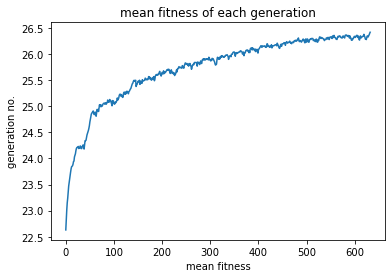

In [49]:
if __name__ == "__main__":

    ga_8q = GeneticAlgorithm8Queens(population_size=100, initialization_fn=initialization_fn, fitness_fn=fitness_fn,
                                    crossover_fn=crossover_fn, crossover_prob=100,
                                    mutation_fn=mutation_fn, mutation_prob=80,
                                    parent_selection_fn=parent_selection_fn, 
                                    survival_selectrion_fn=survival_selectrion_fn, 
                                    number_of_iterations=10000)

    # test loop
    generation, answer, fitness_arr = ga_8q.loop()
    
    plt.xlabel('mean fitness')
    plt.ylabel('generation no.')
    plt.title("mean fitness of each generation")
    plt.plot(fitness_arr)
    
    print(f'Done! Finished {generation} fitness evaluation.')
    print("chromosoem: ", answer, "   fitness: ", ga_8q.fitness_fn(answer))
    ga_8q.show_state(answer)
    print("~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.")
    
    # test print
    # print(ga_8q.population[0])
    # ga_8q.show_state(ga_8q.population[0])

    # test crossover
    # print(ga_8q.population[82])
    # print(ga_8q.population[80])
    # print(crossover_fn(ga_8q.population[82], ga_8q.population[80], 80))

    #test mutation
    # print(ga_8q.population[0])
    # new_chromosome = ga_8q.mutation_fn(ga_8q.population[0], 80)
    # print(new_chromosome)

    # test parent selection
    # ga_8q.parent_selection_fn(ga_8q.population)

    # test survival selection
    # ga_8q.survival_selectrion_fn(ga_8q.population, ga_8q.population[0], ga_8q.population[1])

    # test fitness
    # print(ga_8q.population[0])
    # ga_8q.show_state(ga_8q.population[0])
    # print(fitness_fn(ga_8q.population[0]))
    

## Changing parameters

* In this section, we are going to change each of **population-size** and **crossmutation-probability** parameters in order to check how number of generation that the answer with **fitness = 28** changes.

In [39]:
# diffrent results we get by changing population

pop_size_arr = [10, 50, 100, 500, 1000]
for pop_size in pop_size_arr:
    ga_8q = GeneticAlgorithm8Queens(population_size=pop_size, initialization_fn=initialization_fn, fitness_fn=fitness_fn,
                                    crossover_fn=crossover_fn, crossover_prob=100,
                                    mutation_fn=mutation_fn, mutation_prob=80,
                                    parent_selection_fn=parent_selection_fn, 
                                    survival_selectrion_fn=survival_selectrion_fn, 
                                    number_of_iterations=10000)

    # test loop
    generation, answer, fitness_arr = ga_8q.loop()

    print(f'Done! Finished {generation} fitness evaluation with population-size {pop_size}.')
    print("chromosoem: ", answer, "   fitness: ", ga_8q.fitness_fn(answer))
    ga_8q.show_state(answer)
    print("~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.")
    print("~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.")



Done! Finished 558 fitness evaluation with population-size 10.
chromosoem:  [4, 1, 3, 6, 2, 7, 5, 0]    fitness:  28.0
  ||  0  ||  1  ||  2  ||  3  ||  4  ||  5  ||  6  ||  7  ||
------------------------------------------------------------
0 ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  Q  ||
1 ||  -  ||  Q  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
2 ||  -  ||  -  ||  -  ||  -  ||  Q  ||  -  ||  -  ||  -  ||
3 ||  -  ||  -  ||  Q  ||  -  ||  -  ||  -  ||  -  ||  -  ||
4 ||  Q  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||
5 ||  -  ||  -  ||  -  ||  -  ||  -  ||  -  ||  Q  ||  -  ||
6 ||  -  ||  -  ||  -  ||  Q  ||  -  ||  -  ||  -  ||  -  ||
7 ||  -  ||  -  ||  -  ||  -  ||  -  ||  Q  ||  -  ||  -  ||
------------------------------------------------------------
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.


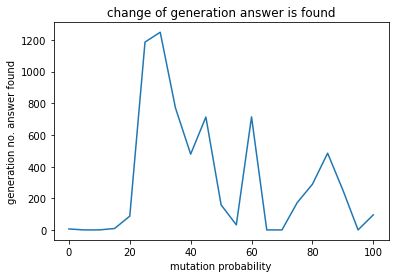

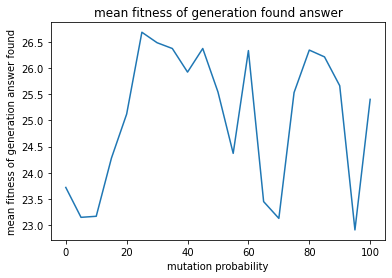

In [46]:
# change mutation probability
mutation_probability_parameter_change = [p for p in range(0, 101, 5)]
generation_found_answer = []
mean_generation_fitness_found_asnwer = []
for mppc in mutation_probability_parameter_change:
    ga_8q = GeneticAlgorithm8Queens(population_size=100, initialization_fn=initialization_fn, fitness_fn=fitness_fn,
                                    crossover_fn=crossover_fn, crossover_prob=100,
                                    mutation_fn=mutation_fn, mutation_prob=mppc,
                                    parent_selection_fn=parent_selection_fn, 
                                    survival_selectrion_fn=survival_selectrion_fn, 
                                    number_of_iterations=10000)
    # test loop
    generation, _, fitness_arr = ga_8q.loop()
    mean_generation_fitness_found_asnwer.append(fitness_arr[-1])
    generation_found_answer.append(generation)

plt.xlabel('mutation probability')
plt.ylabel('generation no. answer found')
plt.title("change of generation answer is found")
plt.plot(mutation_probability_parameter_change, generation_found_answer)

plt.figure()

plt.xlabel('mutation probability')
plt.ylabel('mean fitness of generation answer found')
plt.title("mean fitness of generation found answer")
plt.plot(mutation_probability_parameter_change, mean_generation_fitness_found_asnwer)

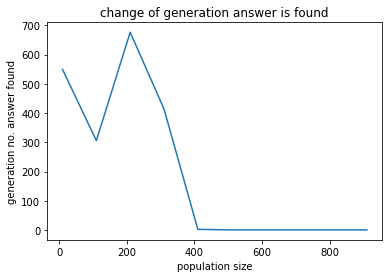

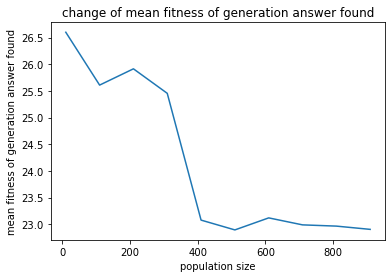

In [48]:
# change population-size
population_size_parameter_change = [p for p in range(10, 1000, 100)]
generation_found_answer = []
mean_generation_fitness_found_asnwer = []
for pspc in population_size_parameter_change:
    ga_8q = GeneticAlgorithm8Queens(population_size=pspc, initialization_fn=initialization_fn, fitness_fn=fitness_fn,
                                    crossover_fn=crossover_fn, crossover_prob=100,
                                    mutation_fn=mutation_fn, mutation_prob=80,
                                    parent_selection_fn=parent_selection_fn, 
                                    survival_selectrion_fn=survival_selectrion_fn, 
                                    number_of_iterations=10000)
    # test loop
    generation, _, fitness_arr = ga_8q.loop()
    mean_generation_fitness_found_asnwer.append(fitness_arr[-1])
    generation_found_answer.append(generation)

    
plt.xlabel('population size')
plt.ylabel('generation no. answer found')
plt.title("change of generation answer is found")
plt.plot(population_size_parameter_change, generation_found_answer)

plt.figure()

plt.xlabel('population size')
plt.ylabel('mean fitness of generation answer found')
plt.title("change of mean fitness of generation answer found")
plt.plot(population_size_parameter_change, mean_generation_fitness_found_asnwer)